In [3]:
"""
chapter 7
"""

# import libs 

from scipy.misc import comb
import matplotlib.pyplot as plt
import numpy as np
import math


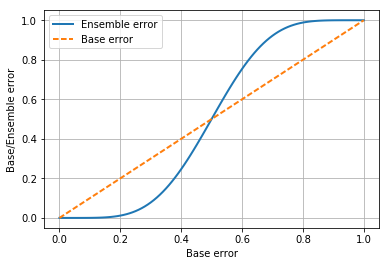

In [4]:
# why ensemble classifier is better 
# compute the ensemble error rates for a range of different base errors from 0.0 to 1.0 

def ensemble_error(n_classifier, error):
    k_start = math.ceil(n_classifier / 2.0)
    probs = [comb(n_classifier, k) * 
             error**k * 
             (1-error)**(n_classifier - k) 
             for k in range(k_start, n_classifier + 1)]
    return sum(probs)


error_range = np.arange(0.0, 1.01, 0.01)
ens_errors = [ensemble_error(n_classifier=11, error=error) for error in error_range]

plt.plot(error_range, ens_errors, label='Ensemble error', linewidth=2)
plt.plot(error_range, error_range, linestyle='--', label='Base error', linewidth=2)
plt.xlabel('Base error')
plt.ylabel('Base/Ensemble error')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# the error probability of an ensemble is always 
# better than the error of an individual base classifier as long as 
# the base classifiers perform better than random guessing (0.5)

In [ ]:
# -------------- majority vote classifier ----------------------
# combine different classification algorithms associated 
# with individual weights for confidence

# build a stronger meta-classifier that balances out the individual classifiers' 
# weaknesses on a particular dataset